# Student Details

#### Name: Harshdeep Singh
#### Class: Msc. IT - 1st sem
#### Roll No: 2441759
#### Subject: Data Analytics

# DIWALI SALES ANALYSIS

Importing python libraries

In [1]:
# for data manipulation
import pandas as pd                     # type: ignore 

# for visualizing data
import matplotlib.pyplot as plt         # type: ignore

# another library for data visualization 
import seaborn as sns                   # type: ignore 

Loading the dataset

In [3]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

Number of rows & columns, format -> (rows, columns)

In [ ]:
df.shape

(11251, 15)

To print first 5 rows of our dataset

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
# to get basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

---

# Data Preprocessing/Cleaning

Removing any rows with missing values directly in the DataFrame

In [ ]:
# drop null values
df.dropna(inplace=True)

Converting the 'Amount' column to integers

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

Checking 'Amount' column datatype

In [ ]:
df['Amount'].dtypes

dtype('int32')

----

To know what columns do we have

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [ ]:
# using describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


---

# Exploratory Data Analysis

#### Customer Demographics Analysis

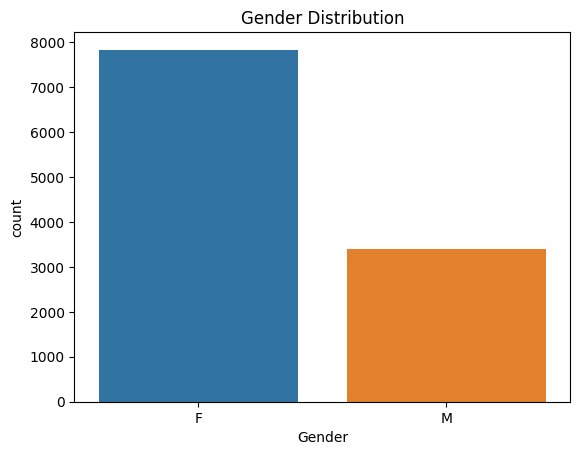

In [ ]:
# plotting a bar chart for Gender and it's count

sns.countplot(x='Gender', hue="Gender", data=df)
plt.title('Gender Distribution')
plt.show()


*From above graph we can see that most of the buyers are females*

---

#### Age Group Analysis

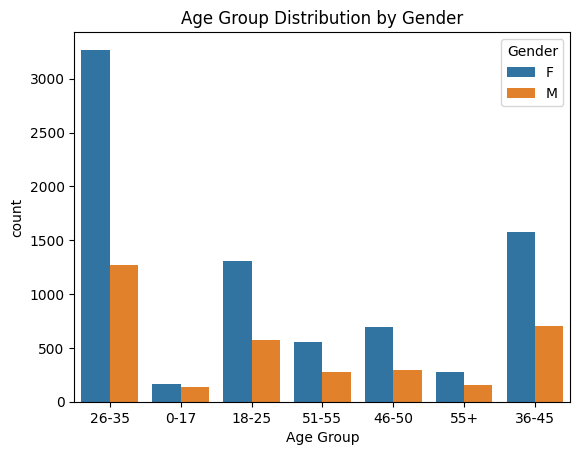

In [ ]:
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Age Group Distribution by Gender')
plt.show()


*From above graph we can see that most of the buyers are of age group between 26-35 yrs female*

---

### Product Analysis

In [ ]:
# Calculate total sales and number of orders by State
orders_by_product = df.groupby('Product_Category').agg(total_sales=('Amount', 'sum'),
                                          num_orders=('Amount', 'count')).reset_index()

# Display the result
orders_by_product.sort_values(by='total_sales', ascending=False, inplace=True)
orders_by_product.head()

,Product_Category,total_sales,num_orders
6,Food,33933883,2490
3,Clothing & Apparel,16495019,2655
5,Electronics & Gadgets,15643846,2087
7,Footwear & Shoes,15575209,1059
8,Furniture,5440051,352


### Visualizing Total Sales by Product Category

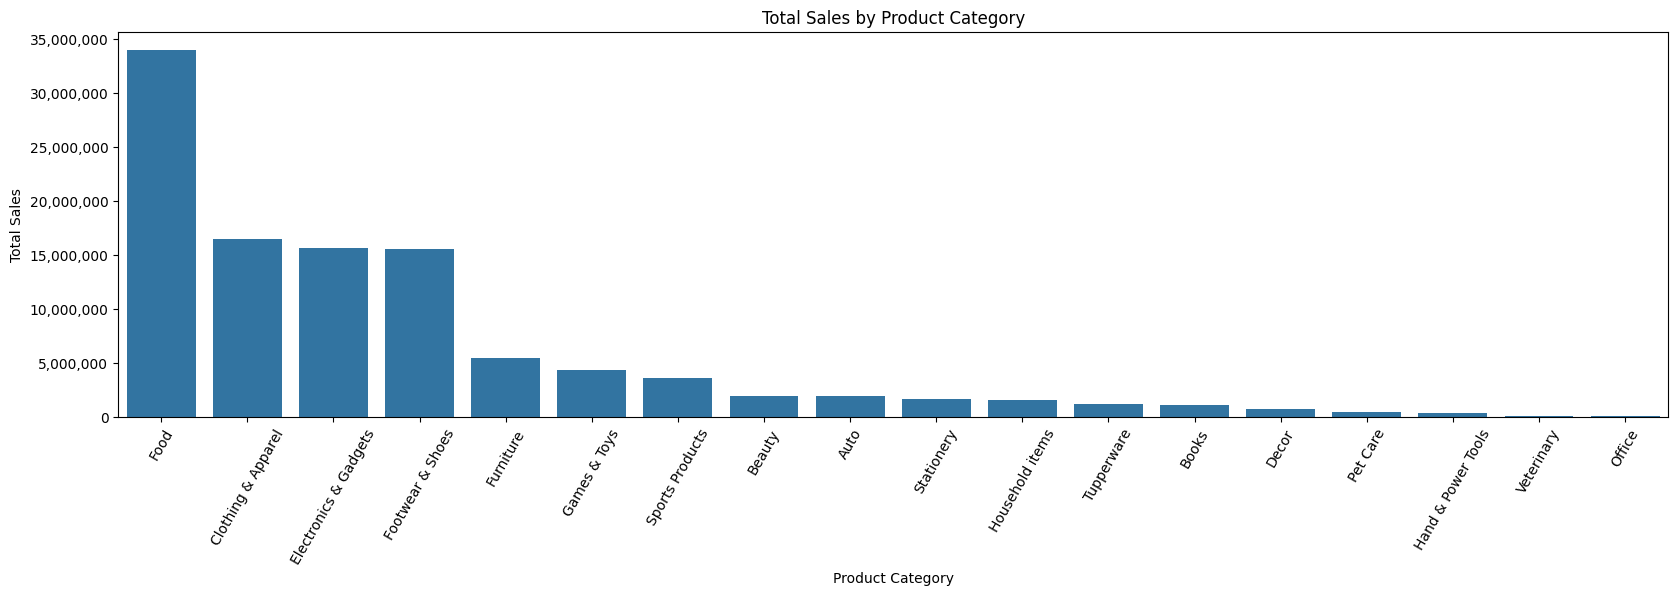

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Product_Category', y='total_sales', data=orders_by_product)

# Format y-axis labels with appropriate formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()

### Visualizing Number of Orders by Product Category

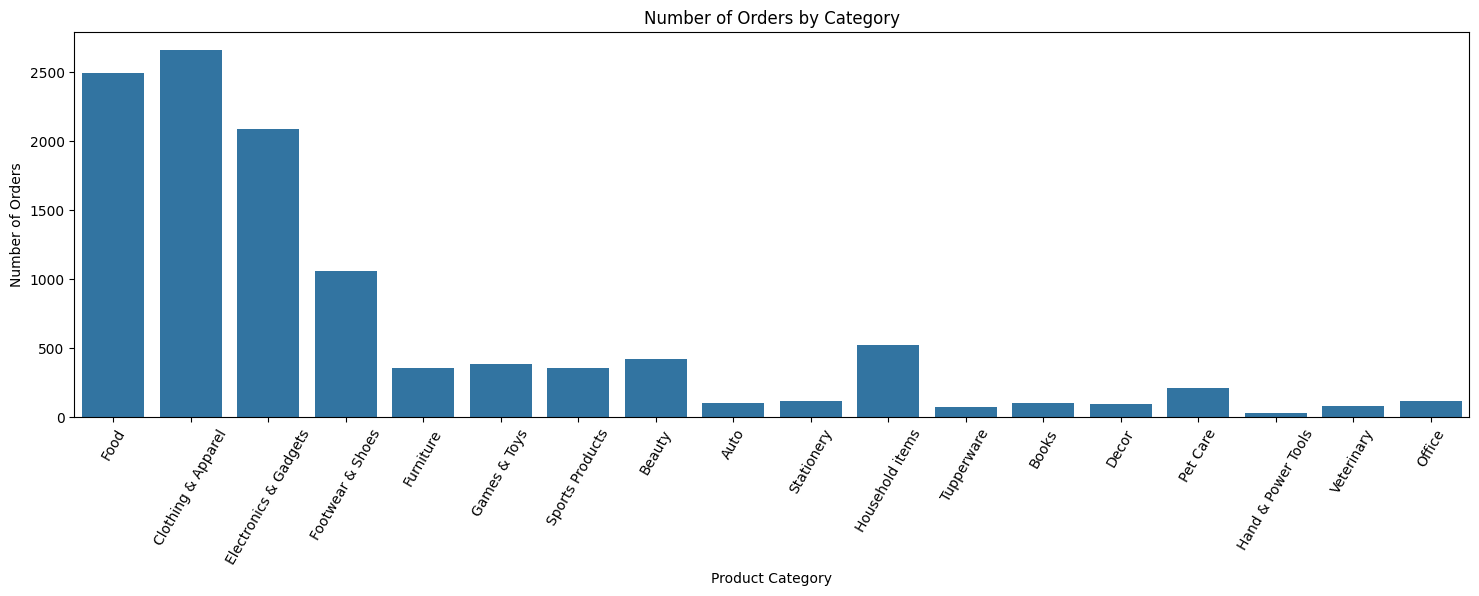

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='Product_Category', y='num_orders', data = orders_by_product)
plt.title('Number of Orders by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()

*From the above graphs we can see that the top 5 categories in sales are:*
1. *Food*
2. *Clothing & Apparel*
3. *Electronics & Gadgets*
4. *Footwear & Shoes*
5. *Furniture*

---

### State Analysis

In [ ]:
# Calculate total sales and number of orders by State
orders_by_state = df.groupby('State').agg(total_sales=('Amount', 'sum'),
                                          num_orders=('Amount', 'count')).reset_index()

# Display the result
orders_by_state.sort_values(by='total_sales', ascending=False, inplace=True)
orders_by_state.head()


,State,total_sales,num_orders
14,Uttar Pradesh,19374968,1944
10,Maharashtra,14427543,1525
7,Karnataka,13523540,1304
2,Delhi,11603818,1104
9,Madhya Pradesh,8101142,921


### Visualizing Total Sales by State

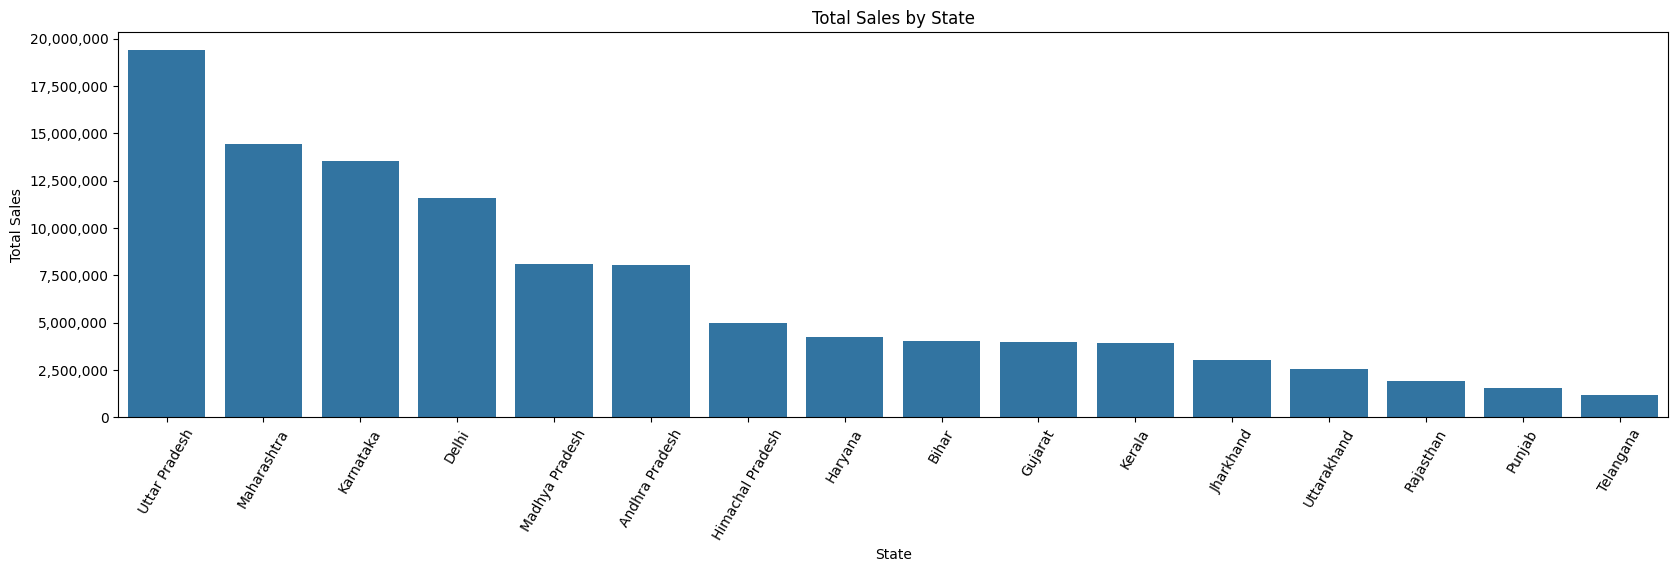

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='State', y='total_sales', data=orders_by_state)

# Format y-axis labels with appropriate formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()

### Visualizing Number of Orders by State

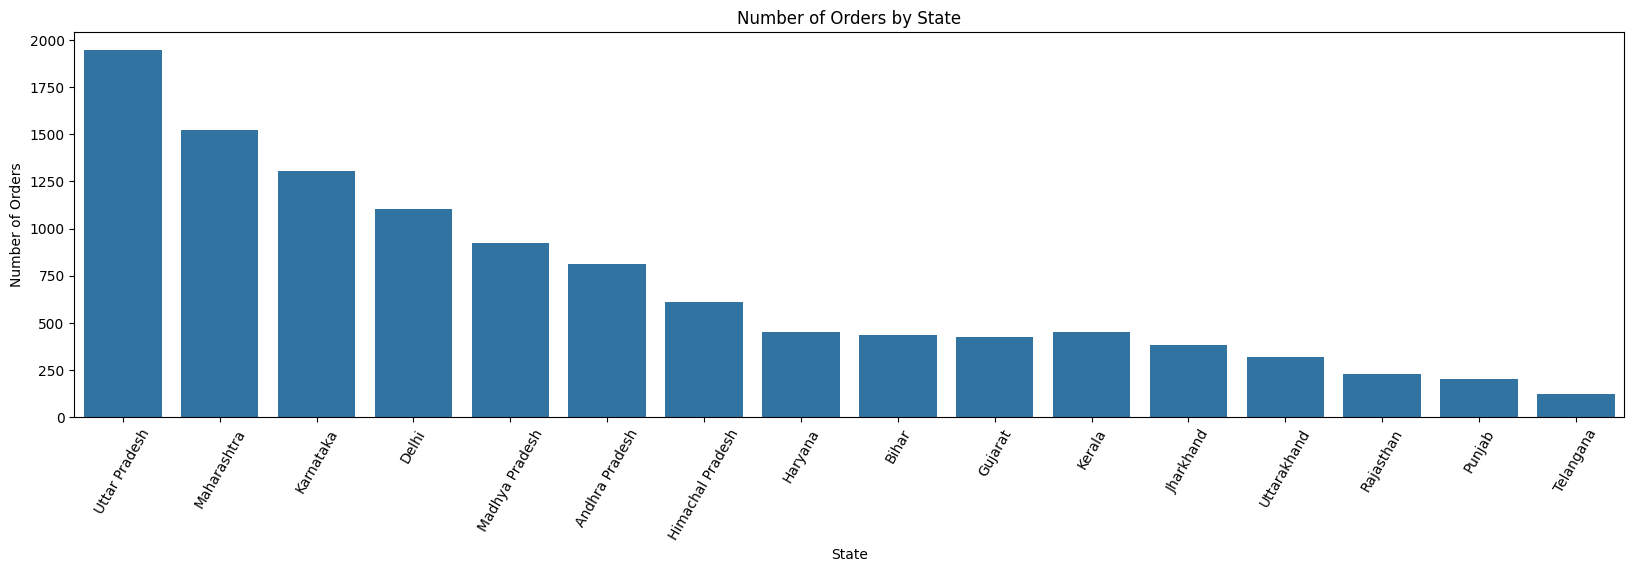

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='State', y='num_orders', data=orders_by_state)
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()


*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


---

### Occupation Analysis

In [ ]:
# Calculate total sales and number of orders by Occupation
orders_by_occupation = df.groupby('Occupation').agg(
    total_sales=('Amount', 'sum'),
    num_orders=('Amount', 'count')
).reset_index()

# Display the result sorted by total sales
orders_by_occupation.sort_values(by='total_sales', ascending=False, inplace=True)
orders_by_occupation.head()


,Occupation,total_sales,num_orders
10,IT Sector,14755079,1583
8,Healthcare,13034586,1408
2,Aviation,12602298,1310
3,Banking,10770610,1137
7,Govt,8517212,854


### Visualizing Total Sales by Occupation

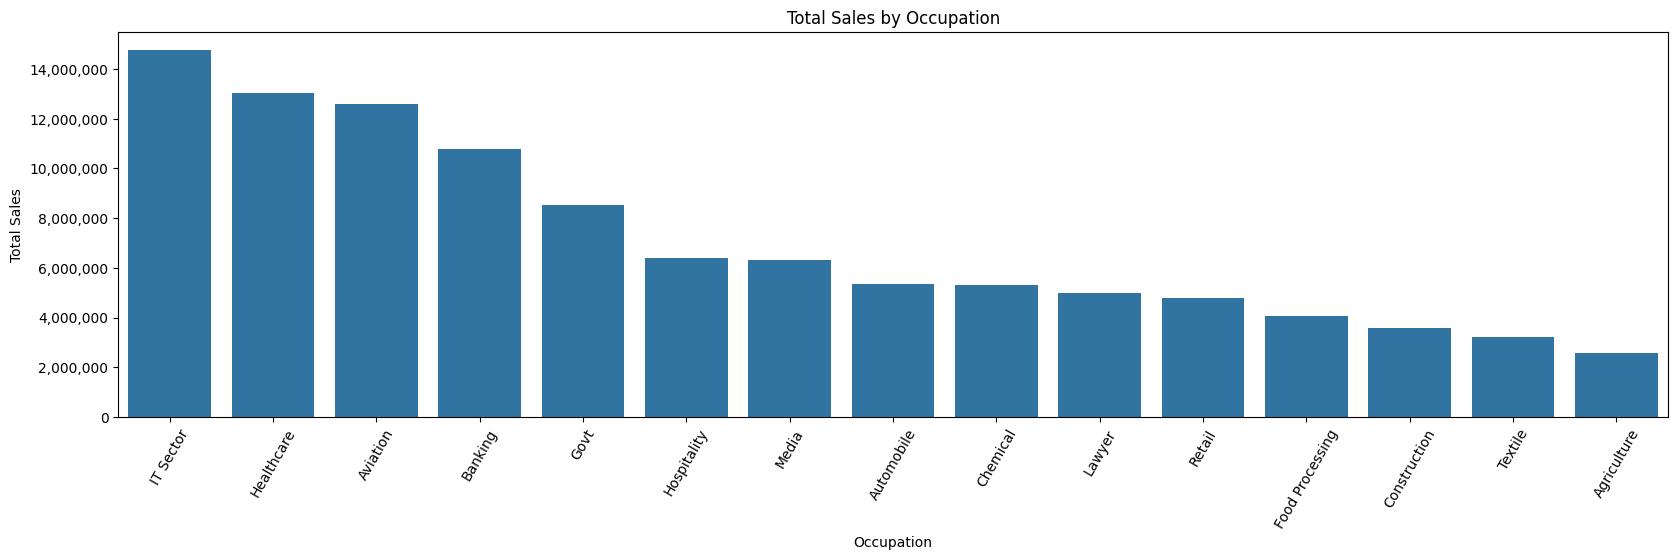

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Occupation', y='total_sales', data=orders_by_occupation)

# Format y-axis labels with appropriate formatting
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Total Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()

### Visualizing Number of Orders by Occupation

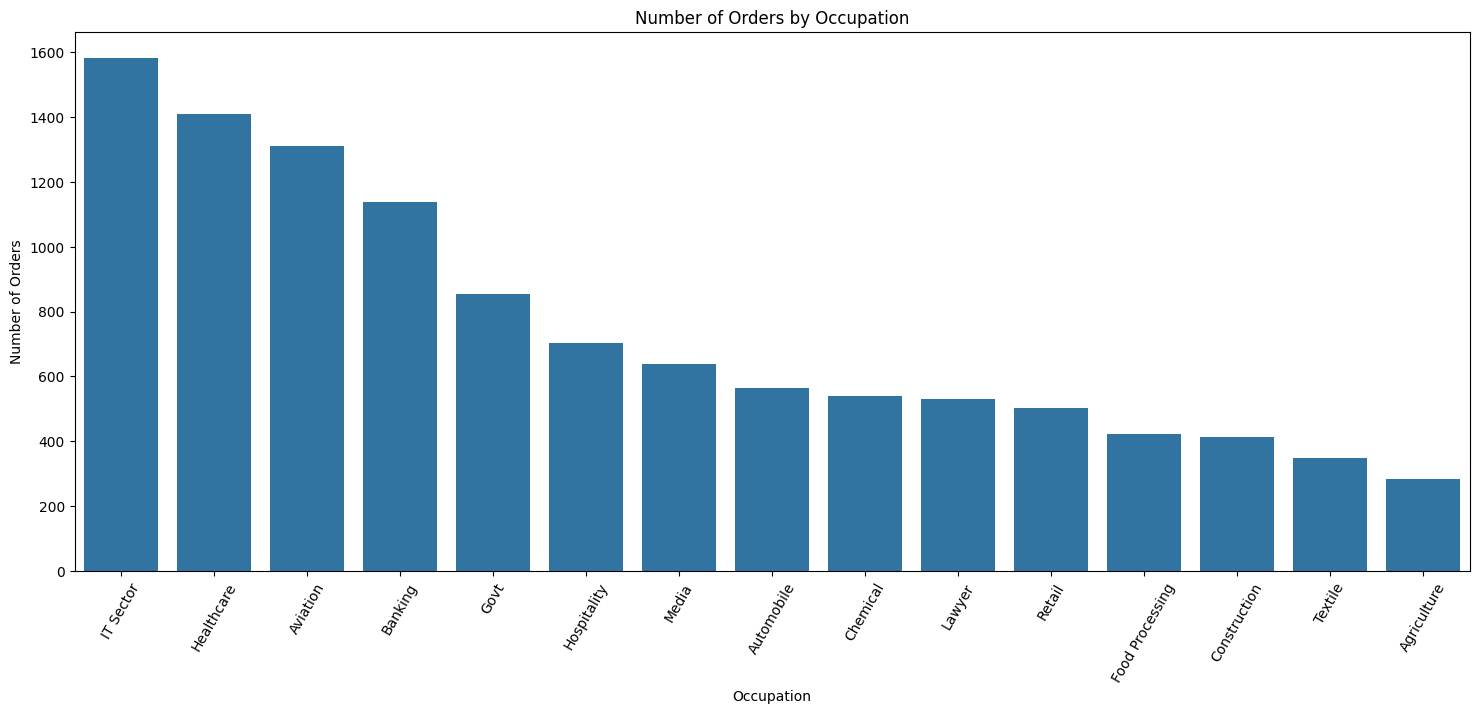

In [ ]:
plt.figure(figsize=(18, 7))
sns.barplot(x='Occupation', y='num_orders', data=orders_by_occupation)
plt.title('Number of Orders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Orders')
plt.xticks(rotation=60)  # Rotate x-axis labels for readability
plt.show()


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Conclusion:


#### Demographic Insights:

The majority of buyers are *female*, highlighting a significant *female* consumer base.

#### Age Group Analysis:

The age group with the highest purchasing activity is *26-35 years*, with *females* in this demographic leading in both *purchase frequency* and *spending*.

#### Top Product Categories: 

The leading product categories contributing to overall sales include:

- Food
- Clothing & Apparel
- Electronics & Gadgets
- Footwear & Shoes
- Furniture

#### Geographic Analysis: 

The states with the highest number of orders and total sales are:

- Uttar Pradesh
- Maharashtra
- Karnataka

#### Occupational Distribution: 

A significant portion of buyers are professionals working in:

- Information Technology (IT)
- Healthcare
- Aviation